# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
from datetime import date
from citipy import citipy
from pprint import pprint
from api_keys import weather_api_key
from api_keys import g_key

# Set output file path
output_data_file = 2369

# Set range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Lists for holding latitude, longitude and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

In [3]:
# Create lists to hold data
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=55fb9823a20c70e9d28d096302f04a28&units=imperial&q='

In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : parit buntar
Processing Record 2 of Set 1 : basco
Processing Record 3 of Set 1 : yertsevo
City not found. Skipping...
Processing Record 4 of Set 1 : chara
Processing Record 5 of Set 1 : punta arenas
Processing Record 6 of Set 1 : morondava
Processing Record 7 of Set 1 : rikitea
Processing Record 8 of Set 1 : jieshou
Processing Record 9 of Set 1 : georgetown
Processing Record 10 of Set 1 : nikolskoye
Processing Record 11 of Set 1 : geraldton
Processing Record 12 of Set 1 : umm kaddadah
Processing Record 13 of Set 1 : tiksi
Processing Record 14 of Set 1 : arraial do cabo
Processing Record 15 of Set 1 : albany
Processing Record 16 of Set 1 : vaini
City not found. Skipping...
Processing Record 17 of Set 1 : bengkulu
Processing Record 18 of Set 1 : mohpa
Processing Record 19 of Set 1 : cape town
Processing Record 20 of Set 1 : lebu
Processing Record 21 of Set 1 : bluff
Processing Record 22 of Set 1 : ukia

City not found. Skipping...
Processing Record 32 of Set 4 : thanh hoa
Processing Record 33 of Set 4 : abnub
City not found. Skipping...
Processing Record 34 of Set 4 : olafsvik
Processing Record 35 of Set 4 : iqaluit
Processing Record 36 of Set 4 : nioro
Processing Record 37 of Set 4 : kenai
Processing Record 38 of Set 4 : termoli
Processing Record 39 of Set 4 : praia
Processing Record 40 of Set 4 : east london
City not found. Skipping...
Processing Record 41 of Set 4 : rawson
Processing Record 42 of Set 4 : tahoua
Processing Record 43 of Set 4 : kushima
Processing Record 44 of Set 4 : edson
Processing Record 45 of Set 4 : astara
City not found. Skipping...
Processing Record 46 of Set 4 : adre
Processing Record 47 of Set 4 : camacupa
Processing Record 48 of Set 4 : stokmarknes
Processing Record 49 of Set 4 : saint-philippe
Processing Record 50 of Set 4 : bakal
Processing Record 0 of Set 5 : gatehouse of fleet
Processing Record 1 of Set 5 : sombrerete
Processing Record 2 of Set 5 : bulu

Processing Record 14 of Set 8 : williams lake
Processing Record 15 of Set 8 : goderich
Processing Record 16 of Set 8 : ponta do sol
Processing Record 17 of Set 8 : lulea
Processing Record 18 of Set 8 : faya
Processing Record 19 of Set 8 : bontang
City not found. Skipping...
Processing Record 20 of Set 8 : kavieng
Processing Record 21 of Set 8 : biloela
Processing Record 22 of Set 8 : marchena
Processing Record 23 of Set 8 : opuwo
Processing Record 24 of Set 8 : beira
Processing Record 25 of Set 8 : kaukauna
Processing Record 26 of Set 8 : lorengau
Processing Record 27 of Set 8 : sur
Processing Record 28 of Set 8 : nichinan
Processing Record 29 of Set 8 : fortuna
Processing Record 30 of Set 8 : mwinilunga
Processing Record 31 of Set 8 : hami
Processing Record 32 of Set 8 : okmulgee
Processing Record 33 of Set 8 : mahanoro
Processing Record 34 of Set 8 : santa cruz de tenerife
Processing Record 35 of Set 8 : souillac
Processing Record 36 of Set 8 : bojnurd
Processing Record 37 of Set 8 :

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create Dataframe
city_data = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list,
            
})
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Parit Buntar,5.1267,100.4932,84.18,70,100,4.27,MY,1631866838
1,Basco,20.4487,121.9702,84.97,72,99,12.19,PH,1631866838
2,Yertsevo,60.7966,40.0860,40.68,80,96,4.85,RU,1631866839
3,Chara,56.9064,118.2631,43.74,48,62,4.99,RU,1631866841
4,Punta Arenas,-53.1500,-70.9167,35.71,93,90,6.91,CL,1631866842


In [7]:
# Export csv to Output foler
city_data.to_csv("output_data/cities_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Exclude cities with humidity over 100%

humidity_over100 = city_data['Humidity']>100
city_data_clean = city_data[-humidity_over100]
city_data_withover100 = city_data[humidity_over100]

city_data_clean.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Parit Buntar,5.1267,100.4932,84.18,70,100,4.27,MY,1631866838
1,Basco,20.4487,121.9702,84.97,72,99,12.19,PH,1631866838
2,Yertsevo,60.7966,40.0860,40.68,80,96,4.85,RU,1631866839
3,Chara,56.9064,118.2631,43.74,48,62,4.99,RU,1631866841
4,Punta Arenas,-53.1500,-70.9167,35.71,93,90,6.91,CL,1631866842


In [9]:
city_data['Humidity'].describe()

count    528.000000
mean      70.032197
std       21.708106
min        5.000000
25%       60.000000
50%       74.500000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

### Max humidity value in the original Dataset is 100. so conclusion is, No cities were found with Humidity over 100

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

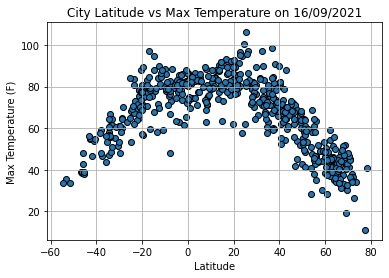

In [11]:
plt.scatter(city_data['Lat'], city_data['Max Temp'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title('City Latitude vs Max Temperature on 16/09/2021')
plt.grid(True)
plt.savefig("output_data/City Latitude vs Max Temperature.png")

# Display plot
plt.show()


Observation: As the latitude  increases or decreases, the temparature drops. Highest temperature is recorded near the equator

In [12]:
#Plot shows latitude vs temperature. 
#Cities which are closer to the eaquator are hotter. 


## Latitude vs. Humidity Plot

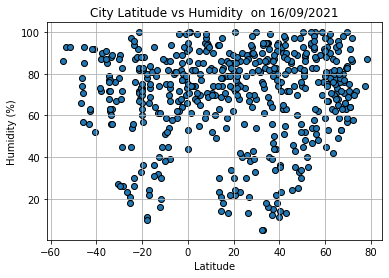

In [13]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(city_data['Lat'], city_data['Humidity'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Latitude vs Humidity  on 16/09/2021')
plt.grid(True)
plt.savefig("output_data/City Latitude vs Humidity.png")
plt.show()

 Humidity is randomly spread across the globe. No relation here

## Latitude vs. Cloudiness Plot

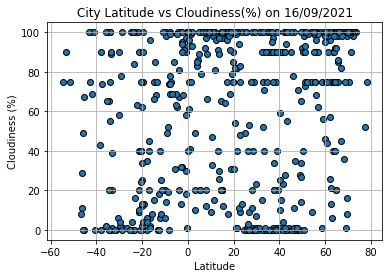

In [14]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(city_data['Lat'], city_data['Cloudiness'], marker = "o", edgecolor='black')


# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Latitude vs Cloudiness(%) on 16/09/2021')
plt.grid(True)
plt.savefig("output_data/City Latitude vs Cloudiness.png")
plt.show()

 Cloudiness is randomly spread across the globe

## Latitude vs. Wind Speed Plot

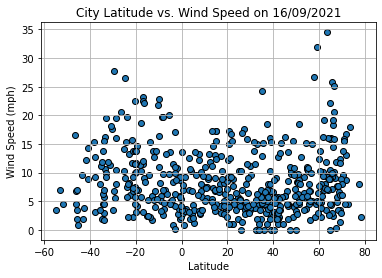

In [15]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(city_data['Lat'], city_data['Wind Speed'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Latitude vs. Wind Speed on 16/09/2021')
plt.grid(True)
plt.savefig("output_data/City Latitude vs Wind Speed.png")

# Display plot
plt.show()

We can see the wind speed is higher around the prime meridian

## Linear Regression

In [16]:

northern_hemisphere = city_data.loc[city_data["Lat"] >= 0.0]
northern_hemisphere.reset_index(inplace=True)

southern_hemisphere = city_data.loc[city_data["Lat"] < 0.0]
southern_hemisphere.reset_index(inplace=True)

In [17]:
northern_hemisphere.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Parit Buntar,5.1267,100.4932,84.18,70,100,4.27,MY,1631866838
1,1,Basco,20.4487,121.9702,84.97,72,99,12.19,PH,1631866838
2,2,Yertsevo,60.7966,40.0860,40.68,80,96,4.85,RU,1631866839
3,3,Chara,56.9064,118.2631,43.74,48,62,4.99,RU,1631866841
4,7,Jieshou,33.2634,115.3611,83.01,61,71,5.48,CN,1631866845


In [18]:
southern_hemisphere.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,4,Punta Arenas,-53.1500,-70.9167,35.71,93,90,6.91,CL,1631866842
1,5,Morondava,-20.2833,44.2833,80.80,63,25,7.47,MG,1631866843
2,6,Rikitea,-23.1203,-134.9692,72.86,76,16,8.19,PF,1631866844
3,10,Geraldton,-28.7667,114.6000,64.81,45,1,16.11,AU,1631866848
4,13,Arraial do Cabo,-22.9661,-42.0278,68.83,87,100,13.22,BR,1631866850


In [19]:
def plot_Linear_Regression(xdata,ydata,xlabel,ylabel,name):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xdata, ydata)
    print(f"The r-value is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,(70,50),xycoords='figure points',fontsize=12,color="red")
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(name)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.841674572413001


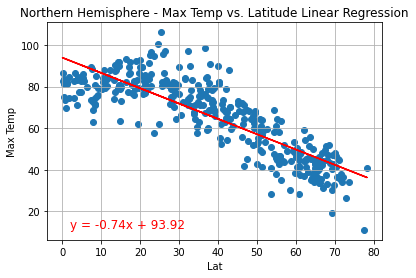

In [20]:

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Max Temp"
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,"output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7819211094388401


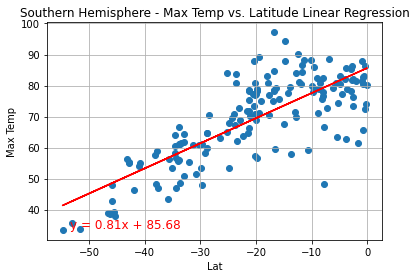

In [21]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Max Temp"
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,"output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05119420925462514


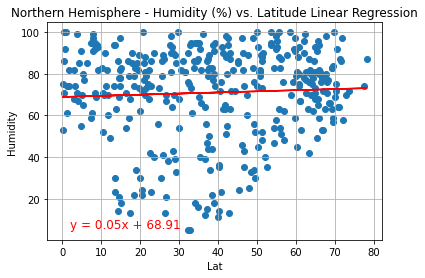

In [22]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Humidity"
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,"output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.05432452213086495


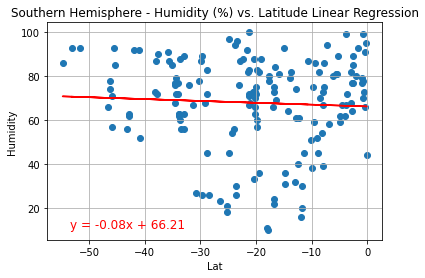

In [23]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Humidity"
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,"output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11472731974638342


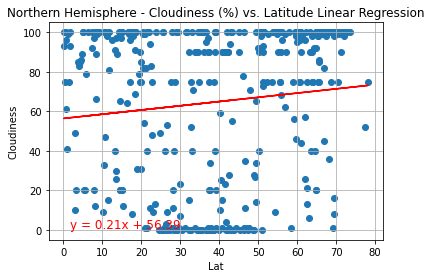

In [24]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Cloudiness"
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,"output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12498786253694395


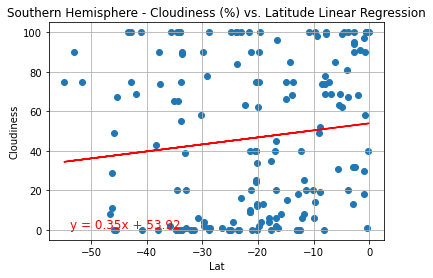

In [25]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Cloudiness"
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,"output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.16090192682300125


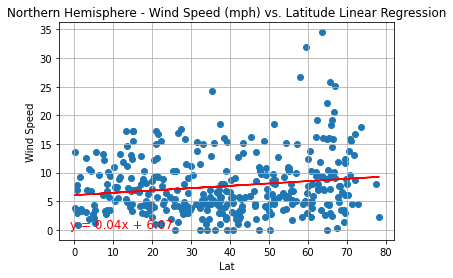

In [26]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Wind Speed"
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,"output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.0358395209209837


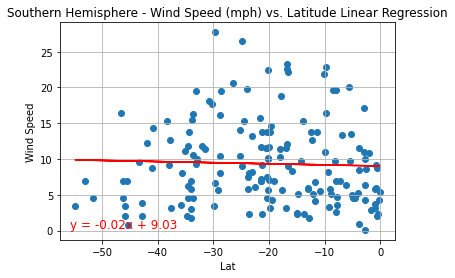

In [27]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Wind Speed"
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,"output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")